<a href="https://colab.research.google.com/github/ddah0329/3th_OUTTA_AI_BootCamp/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 페이지 번호 범위 설정 (1부터 3까지)
page_range = range(1, 4)

# 기본 URL (pageIdx 부분만 동적으로 변경)
base_url = "https://www.oliveyoung.co.kr/store/display/getMCategoryList.do?dispCatNo=1000001000100150001&fltDispCatNo=&prdSort=01&pageIdx={}&rowsPerPage=36&searchTypeSort=btn_thumb&plusButtonFlag=N&isLoginCnt=0&aShowCnt=0&bShowCnt=0&cShowCnt=0&trackingCd=Cat1000001000100150001_Small&amplitudePageGubun=&t_page=&t_click=&midCategory=%ED%81%AC%EB%A6%BC&smallCategory=%EC%86%8C_%ED%81%AC%EB%A6%BC&checkBrnds=&lastChkBrnd="

# 결과 저장할 리스트
results = []

# 각 페이지의 데이터를 크롤링하는 함수
def crawl_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 'prd_info' 클래스에 해당하는 div 내부에서 a 태그 추출
    product_infos = soup.select('.prd_info')

    for product in product_infos:
        # 브랜드명과 상품명을 추출
        brand = product.select_one('.tx_brand').get_text(strip=True)
        name = product.select_one('.tx_name').get_text(strip=True)

        # 상품 링크 추출 (href 속성)
        link_tag = product.select_one('a')
        product_link = link_tag['href'] if link_tag else None

        # 추출한 데이터를 results 리스트에 추가
        if product_link:
            results.append({
                "brand": brand,
                "name": name,
                "url": product_link
            })

# 상품별 상세 페이지에서 별점과 리뷰 수를 가져오는 함수
def get_review_data(product_url):
    response = requests.get(product_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 별점과 리뷰 수 추출
    rating = soup.select_one('p#repReview b').get_text(strip=True) if soup.select_one('p#repReview b') else "N/A"
    review_count = soup.select_one('p#repReview em').get_text(strip=True) if soup.select_one('p#repReview em') else "N/A"

    return rating, review_count


In [6]:
# 페이지 번호를 변경하면서 크롤링 수행
for page_idx in page_range:
    url = base_url.format(page_idx)
    crawl_page(url)

# 각 상품 페이지에 접속하여 별점과 리뷰 수 크롤링
for item in results:
    rating, review_count = get_review_data(item['url'])
    item['rating'] = rating
    item['review_count'] = review_count

# # 크롤링 결과 출력
# for item in results:
#     print(f"브랜드: {item['brand']}")
#     print(f"상품명: {item['name']}")
#     print(f"링크: {item['url']}")
#     print(f"별점: {item['rating']}")
#     print(f"리뷰 수: {item['review_count']}")
#     print("-" * 100)

# 결과를 데이터프레임으로 변환
df = pd.DataFrame(results)

# CSV 파일로 저장
df.to_csv('oliveyoung_products_data.csv', index=False, encoding='utf-8-sig')

# 크롤링한 상품의 총 개수 출력
print(f"\n전체상품 : {len(results)}")


전체상품 : 108


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<ipython-input-8-8f3938f749d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ratings_float, palette="Blues")


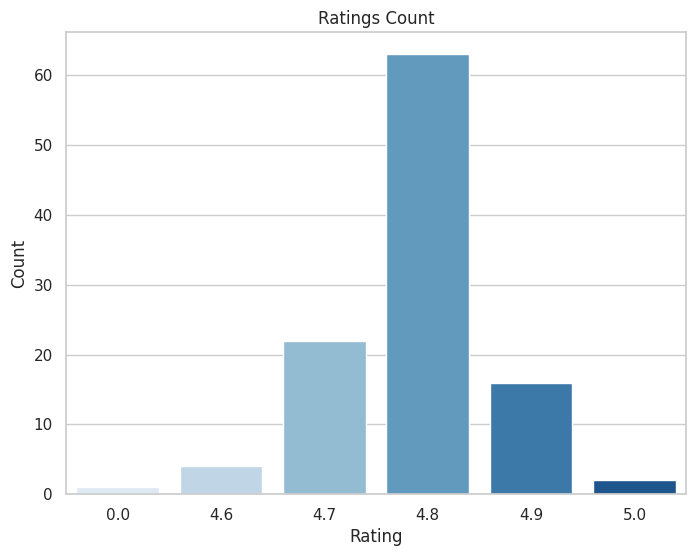

In [8]:
# 'rating' 데이터를 리스트로 묶음
ratings = [item['rating'] for item in results if item['rating'] != "N/A"]

# 문자열을 실수로 변환
ratings_float = [float(r) for r in ratings]

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 별점별 빈도수
plt.figure(figsize=(8, 6))
sns.countplot(x=ratings_float, palette="Blues")
plt.title('Ratings Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()